# 외부데이터 탐색  
  
시멘트 혼화제의 정보가 많지 않아, 
시멘트 수요와 관련이 있을 것으로 예상되는 변수를 탐색 후 
시멘트 혼화제 판매량과의 상관계수를 비교함.
  
### 한국API  
  
- 가동률지수
- 건축착공면적(선정)
- 건설수주
- 미분양현황
  
  
상관계수가 가장 높은 건축착공면적을 외부데이터로 선정

In [ ]:
# 그래프 그리기 위해 한글폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [9]:
import pandas as pd

# 데이터셋 불러오기

sales_df = pd.read_csv('/content/drive/MyDrive/5조_스마트팩토리/조현정/data(2016)_2.csv', index_col=0)

sales_df['납기일자'] = pd.to_datetime(sales_df['납기일자'])
sales_df.set_index('납기일자',inplace=True)
sales_df = sales_df[['sold_quant']]
sales_df = sales_df.resample('M').sum()
sales_df

,sold_quant
납기일자,
2016-01-31,4373700.0
2016-02-29,4441200.0
2016-03-31,7502370.0
2016-04-30,7874180.0
2016-05-31,7716310.0
...,...
2020-12-31,7737410.0
2021-01-31,4354840.0
2021-02-28,5768080.0


In [10]:
import pandas as pd
import requests

# 한국은행 API

def korea_bank(col_name, code, item_code1='?', item_code2='?'):
  key = 'BBTRYO7WX8OVQ7IL8XZJ'
  data_start = '1'
  data_end= '1000'
  cycle = 'MM'
  search_start = '201601'
  search_end = '202104'
  url = f'http://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/{data_start}/{data_end}/{code}/{cycle}/{search_start}/{search_end}/{item_code1}/{item_code2}'
  res = requests.get(url)
  data = res.json()
  data = data['StatisticSearch']['row']
  df = pd.DataFrame(data).set_index('TIME')
  df = df[['DATA_VALUE']]
  df.rename(columns={df.columns[0]:col_name},inplace=True)
  df = df.astype('float')
  return df

In [11]:
가동률지수 = korea_bank('가동률지수','080Y111','I32AL3','I11B') # 제조업생산능력및가동률지수/시멘트,석회,플라스터및그제품제조업/가동률지수(원지수)

In [12]:
건축착공면적 = korea_bank('건축착공면적','085Y136','1','I47AB') # 건축물착공현황,연면적

In [13]:
건설수주 = korea_bank('건설수주','080Y017','I42A') # 국내건설수주액/총수주액

In [14]:
미분양현황 = korea_bank('미분양현황','085Y039','I410A') # 미분양주택현황/전국

,sold_quant,가동률지수,건축착공면적,건설수주,미분양현황
sold_quant,1.000000,0.675065,0.958621,0.263615,-0.068933
가동률지수,0.675065,1.000000,0.699262,0.120346,0.276803
건축착공면적,0.958621,0.699262,1.000000,0.233461,-0.087770
건설수주,0.263615,0.120346,0.233461,1.000000,-0.417553
미분양현황,-0.068933,0.276803,-0.087770,-0.417553,1.000000


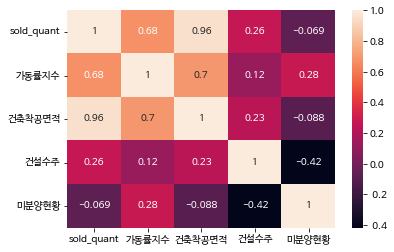

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings('ignore')

sales_df.index = 가동률지수.index
df = pd.concat([sales_df, 가동률지수, 건축착공면적, 건설수주, 미분양현황],axis=1)

sns.heatmap(df.corr(),annot=True)
display(df.corr())